This exercise is based on Menczer et al **A First Course in Network Science** which can be accessed [here](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/blob/master/tutorials/Chapter%202%20Tutorial.ipynb).

In [ ]:
!pip install nxviz=='0.6.3'

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz

# 1. Dataset: US air traffic network

[This](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/tree/master/datasets) repository contains several example network datasets. Among these is a network of US air travel routes:

In [ ]:
# download the dataset 
!gdown https://drive.google.com/uc?id=1ZEDgcLpDzgN0LUzQlxkCYm0_v3z4XSwy

Downloading...
From: https://drive.google.com/uc?id=1ZEDgcLpDzgN0LUzQlxkCYm0_v3z4XSwy
To: /content/openflights_usa.graphml.gz
100% 31.5k/31.5k [00:00<00:00, 68.8MB/s]


In [ ]:
G = nx.read_graphml('openflights_usa.graphml.gz')

The nodes in this graph are airports, represented by their [IATA codes](https://en.wikipedia.org/wiki/List_of_airports_by_IATA_code:_A); two nodes are connected with an edge if there is a scheduled flight directly connecting these two airports. We'll assume this graph to be undirected since a flight in one direction usually means there is a return flight.

Thus this graph has edges
```
[('HOM', 'ANC'), ('BGM', 'PHL'), ('BGM', 'IAD'), ...]
```
where ANC is Anchorage, IAD is Washington Dulles, etc.

These nodes also have **attributes** associated with them, containing additional information about the airports:

In [ ]:
G.nodes['IND']

{'IATA': 'IND',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'name': 'Indianapolis International Airport'}

Node attributes are stored as a dictionary, so the values can be accessed individually as such:

In [ ]:
G.nodes['IND']['name']

'Indianapolis International Airport'

It is possible to note the number of nodes and edges.

In [ ]:
G.number_of_nodes()

546

In [ ]:
G.number_of_edges()

2781

# EXERCISE 1

Is there a direct flight between Indianapolis and Fairbanks, Alaska (FAI)? A direct flight is one with no intermediate stops.

In [ ]:
G.has_edge("IND", "FAI")

False

There is no direct flight between Indianapolis and Fairbanks

# EXERCISE 2

If I wanted to fly from Indianapolis to Fairbanks, Alaska what would be an itinerary with the fewest number of flights?

In [ ]:
nx.shortest_path(G, "IND", "FAI")

['IND', 'BOS', 'SEA', 'FAI']

# EXERCISE 3

Is it possible to travel from any airport in the US to any other airport in the US, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [ ]:
nx.is_connected(G)

False

In [ ]:
for component in list(nx.connected_components(G)):
    print(len(component))

539
3
4


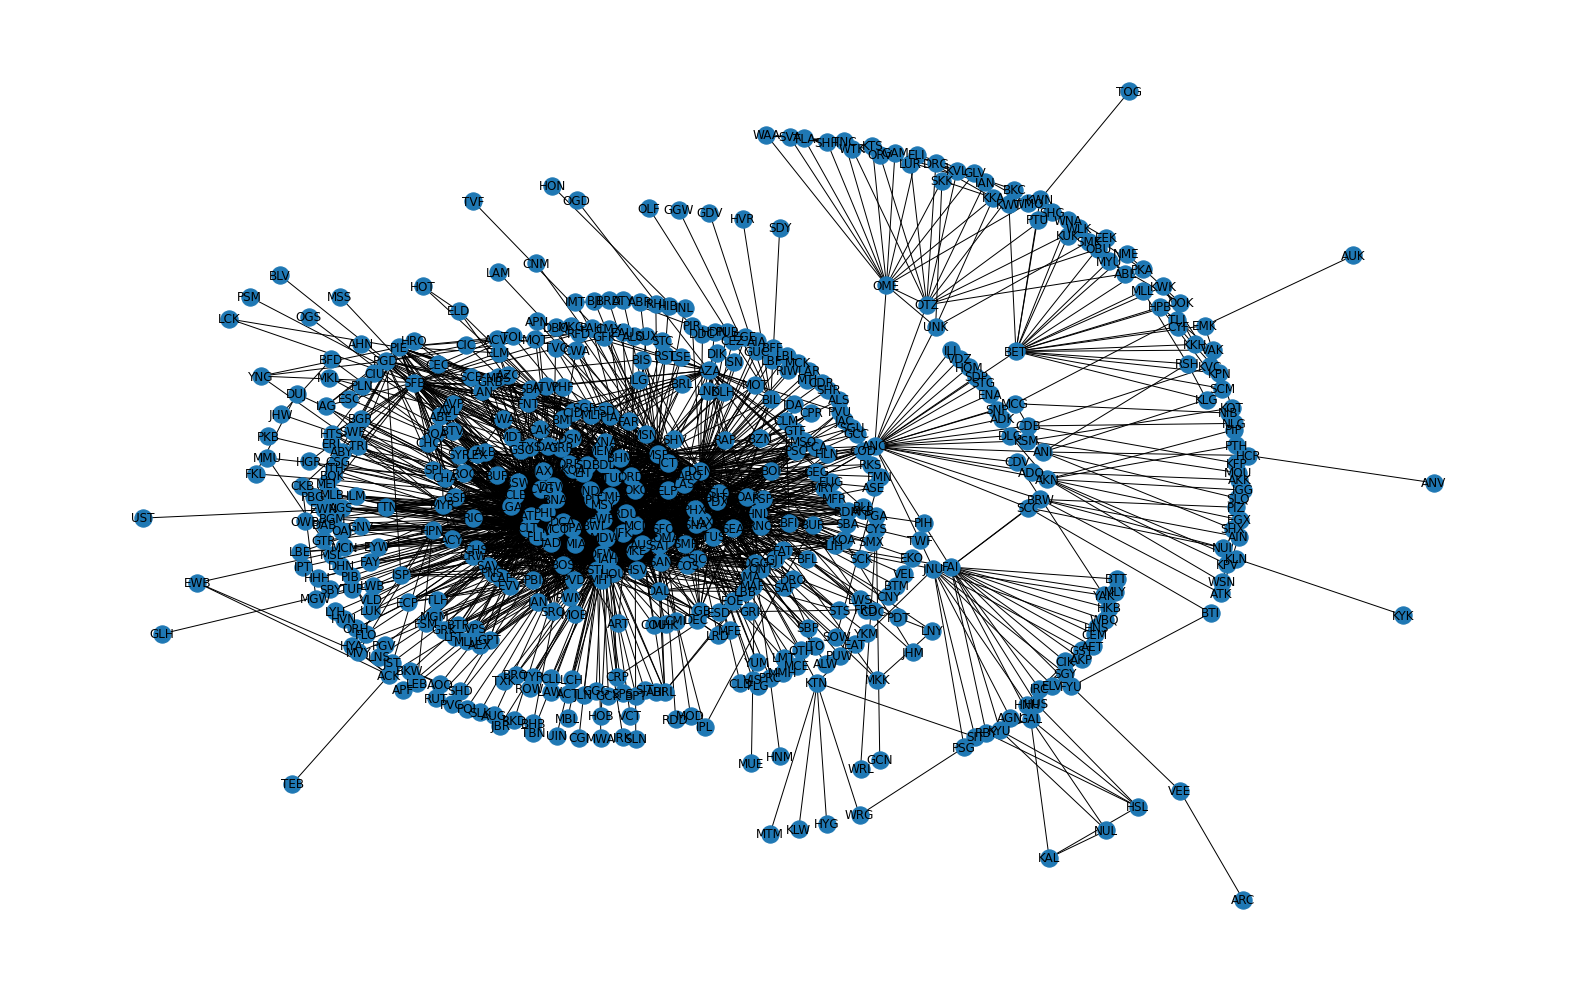

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (28, 18))

nx.draw_networkx(G, pos = nx.kamada_kawai_layout(G), ax = ax)
ax.axis("off")
plt.show()